In [1]:
import numpy as np
import queue
from statistics import mean
import matplotlib.pyplot as plt
import math
import random

In [2]:
def avl_server(t,servers):
    low = len(servers)
    i = 0
    for s in servers:
        if t > s[1]:
            if low == len(servers):
                low = i
            elif s[1] < servers[low][1]:
                low = i
        i += 1
    if low < len(servers):
        return low #return server with earliest idle time
    return len(servers)

def get_avl_servers(t,servers,n):
    empty = []
    i = 0
    for s in servers:
        if t >= s[1]: #get empty servers
            empty.append((i,s[1]))
        i += 1
    empty.sort(key = lambda x: x[1])
    return empty[:n] #return the [server index,free time]

def busy_server_n(t,servers):
    n = 0
    i = 0
    for s in servers:
        if t >= s[1] or t < s[0]: #get empty servers
            n += 1
            #print(i)
        i+=1
    return len(servers)-n #reverse




In [8]:
arr_rate = 2
srv_rate = 2
duration = 3600*10
server_n = 2
job_size = 1

t = 0
jobs_arr_t = []
while t <= duration:
    iat = np.random.exponential(1/arr_rate)
    t += iat
    jobs_arr_t.append((t,random.randint(1,job_size)))

jobs_arr_t

[(0.019413602338698505, 1),
 (0.20306809954669958, 1),
 (0.9324486528192681, 1),
 (1.1395720390823998, 1),
 (1.281781007140326, 1),
 (1.9455868582943667, 1),
 (2.1634294224467108, 1),
 (3.254718657732666, 1),
 (3.547579701153758, 1),
 (4.526710933239583, 1),
 (4.700293801878674, 1),
 (5.219953585270556, 1),
 (5.551070435932387, 1),
 (5.765161656874826, 1),
 (6.50952910432801, 1),
 (7.312204333438489, 1),
 (7.462858699313794, 1),
 (7.54951445478075, 1),
 (7.643163098734717, 1),
 (8.290338847224017, 1),
 (8.772741578196666, 1),
 (8.998587935830225, 1),
 (9.509491092241571, 1),
 (9.666000816052598, 1),
 (10.679056844129693, 1),
 (12.911391963512877, 1),
 (14.559574075934151, 1),
 (15.666205951346452, 1),
 (16.60707527819645, 1),
 (16.945326158181945, 1),
 (17.21011406589888, 1),
 (17.417959474395115, 1),
 (17.47361504028709, 1),
 (17.552186509419144, 1),
 (17.70186082152866, 1),
 (18.5877363796488, 1),
 (19.51230866804369, 1),
 (19.87862844563276, 1),
 (19.958165299786906, 1),
 (20.433847

In [9]:
waiting_times = []
response_times = []
queue = []

servers = [] #[service_start,end]
for s in range(server_n):
    servers.append([0,0])

busy_times = []
for s in range(server_n):
    busy_times.append([])

server_load = [[0,0]]
queue_size = [[0,0]]

job_id = 0
while job_id < len(jobs_arr_t) or len(queue) > 0:
    t = 999999999
    curr_job = ''
    if job_id < len(jobs_arr_t):
        curr_job = jobs_arr_t[job_id]
    for s in servers:
        if s[1] > 0 and s[1] < t and s[1] > server_load[-1][0]:
            t = s[1]
    if job_id < len(jobs_arr_t) and jobs_arr_t[job_id][0] < t:
        t = jobs_arr_t[job_id][0]
        queue.append(curr_job)
        job_id += 1
        #print('Job arrive size '+str(curr_job[1]))
    print(t)
    
    queue_id = 0
    #print(queue)
    while queue_id < len(queue):
        avl_servers_n = len(servers)-busy_server_n(t,servers)
        if avl_servers_n == 0:
            break
        job = queue[queue_id]
        if avl_servers_n >= job[1]:
            ready_servers = get_avl_servers(t,servers,job[1])
            st = np.random.exponential(1/srv_rate)
            for s in ready_servers:
                server_id = s[0]
                servers[server_id] = [t,t+st]
            waiting_times.append((t-job[0],job[1]))
            response_times.append((t+st-job[0],job[1]))
            queue.pop(queue_id)
            queue_id = 0
            #print('Job start service size '+str(job[1]))
        else:
            queue_id += 1
    server_load.append((t,busy_server_n(t,servers)))
    queue_size.append((t,len(queue)))
    #print('------------')

0.019413602338698505
0.20306809954669958
0.2780201865854987
0.5706257377823928
0.9324486528192681
1.1395720390823998
1.281781007140326
1.9455868582943667
2.1634294224467108
2.573107393448311
2.747224494589272
2.800727077540295
2.8905170291288353
3.1941792453500866
3.254718657732666
3.547579701153758
3.7893918615298205
3.9318598710022963
4.526710933239583
4.700293801878674
4.784861058332175
5.219953585270556
5.445817682712424
5.551070435932387
5.721055582669302
5.765161656874826
6.50952910432801
6.965999232675473
7.095229906717163
7.216806524228898
7.312204333438489
7.462858699313794
7.54951445478075
7.643163098734717
7.763014414927572
7.798958934716799
8.226021264524768
8.290338847224017
8.389128553399019
8.630863947057751
8.772741578196666
8.998587935830225
9.01572245811675
9.058543415340798
9.509491092241571
9.647494054743186
9.666000816052598
9.746717457527948
10.679056844129693
10.932786657580383
12.911391963512877
13.033042279632303
14.559574075934151
14.725140471817157
15.6662059

827.3131738204795
827.7418528749052
828.1085777872479
828.3801749118082
829.0319133455108
829.3515376780849
829.3999587484492
829.4708880697997
829.5651810789609
829.7679719655385
829.8543329843036
830.0416207767929
830.8600518483427
831.3191588382023
831.4116554214262
831.4213680784197
831.7178952271671
832.3154573789031
832.6733568059338
832.7483454917345
833.0144692663603
833.1486817387491
833.4698873422329
833.53536881643
833.577925501732
833.6323148291252
833.8354528147272
834.9044696905019
834.954184035895
835.2581291257158
835.3129642768871
835.3225655157476
835.4364126394707
835.5154284983631
835.5558228641557
835.5816049056604
836.1530613660569
836.379204964232
837.1947409125719
837.5224133987823
837.6390283142373
837.7255843626413
837.8140925769468
837.8153208454687
838.2186253264725
838.3358723309863
838.3387033730301
838.4037900250773
838.5304028983933
838.697356583606
838.9039389439314
838.9916317248367
839.1933657950775
840.225191894049
841.6624149940061
841.7921657863947

1701.7645326496033
1702.041941215276
1702.1006820569025
1702.63732172887
1702.785609375305
1702.8772230897512
1702.9558410532659
1703.1930183313546
1703.279216895402
1703.4551909694533
1703.96749378158
1704.0205283404237
1704.0663847600729
1705.8459346685156
1706.6408818366692
1707.0420277434619
1707.0468273688934
1707.2142006675906
1707.7222617927875
1708.3767934692253
1708.4349313750674
1708.4850911719946
1708.5553837133054
1708.561347422385
1708.8273830093967
1708.8903884384736
1708.995567412051
1708.9993666844503
1709.195201797836
1710.4955381186996
1710.533042112578
1710.934534640574
1711.237021014478
1711.498105849025
1711.5977497684967
1712.4155091066068
1712.6032674076669
1712.6660288068854
1713.2985574524043
1713.3841296932694
1713.861606742055
1713.9076727668667
1713.927056345662
1713.9275815280632
1713.945845817352
1714.0961526234178
1714.1971324193837
1714.5039646584157
1714.7337079751621
1714.8929258878015
1715.0983165221471
1715.357842447313
1715.4809207909298
1715.659371

2591.038801257562
2592.175785286637
2592.353101866989
2592.9221862863587
2592.999752846423
2593.0189189284774
2593.1324897840545
2593.221984585839
2593.3300649962252
2593.6127342254003
2593.7554316953833
2593.781054520464
2594.52948980731
2594.6940908352017
2595.069199281978
2595.178644960253
2595.591800306643
2595.7754750733725
2596.1448647169427
2597.3849862983693
2597.520265013196
2597.5366596167632
2597.702422956829
2597.745131782161
2597.800505705475
2598.1665635764243
2598.3279751396053
2598.7437469561823
2599.065761493596
2599.0979659415393
2599.825728849597
2599.9039918675658
2599.909357300648
2600.1892999733022
2600.231876911045
2600.2378261622675
2600.355993319515
2600.4387131327553
2600.9884669034655
2601.179962677441
2602.409905112375
2602.643540267977
2603.1582458015787
2603.8747789528607
2604.0659587629843
2604.26938080525
2604.5504957471894
2605.0716403849256
2605.2476799953565
2605.2854923402692
2605.6346571860304
2606.3527187426193
2606.4991458890777
2607.260603041095


3242.540281058112
3242.751502913498
3242.8030972400434
3242.8891806063275
3242.9582681633788
3242.9638913865024
3243.23120359646
3243.2400861708866
3243.340214685047
3243.747334865519
3244.126305627015
3244.3837381622448
3244.6916128365606
3245.021045468157
3245.3797920962948
3245.474514664328
3246.036079443364
3246.528567329538
3246.5816331342266
3246.662859699964
3247.1494530127593
3247.279210463362
3247.4419895391434
3247.531744261911
3247.5423982678863
3249.097817715755
3249.136094308004
3249.8519572346345
3250.5876019646535
3251.1134708299337
3251.4362081150616
3251.513042651894
3251.51861920448
3251.6375606322
3251.6812102973595
3251.7504302037833
3251.821894707661
3251.9941285434547
3252.0244594724186
3252.0391731219793
3252.3740259148303
3253.0063259107746
3253.200751027271
3253.223998732207
3253.2885619648137
3253.344952398722
3253.3865899248995
3253.4010582243795
3253.92028736497
3254.0767896660245
3254.1279456385682
3256.3309143623005
3256.581200205671
3256.6344997264096
325

3916.484690268417
3916.7480984810527
3916.946730473358
3917.141306155097
3917.1771993647935
3917.386464260469
3917.4533480754394
3917.7052375417657
3917.896013766034
3918.38751091625
3918.502230316738
3918.5111225598866
3918.9120803607357
3918.987556621564
3919.1354716998417
3919.640482982074
3920.081790611186
3920.2192168747165
3920.3459532005354
3921.475465146266
3921.4881582542002
3922.193700877032
3922.291303683789
3922.5630277895852
3922.600188079406
3924.56606743304
3924.6594260541933
3924.796757726025
3924.797559210865
3924.8443814154143
3925.220668982475
3925.4378975776904
3926.000883333206
3926.016038020295
3926.0334820474645
3926.1138113429065
3926.1286991295106
3926.6543978042946
3927.012903647759
3927.091873788255
3927.4694216463936
3928.6079018350974
3928.701487662064
3928.7638010398705
3928.998245617001
3929.2546348722685
3929.4669765715707
3930.283466626296
3930.7654297568743
3930.9808490449714
3931.0866803071744
3931.5339175292015
3931.6079947728263
3931.95303904093
393

4455.885080128966
4456.374346778594
4456.4529160278325
4456.729920239357
4456.732968573412
4456.797822024664
4456.818536191685
4457.171865872388
4457.92773028306
4458.279698852924
4459.228959845449
4459.410298647145
4459.878925990784
4459.899291574652
4460.864489755216
4461.004647288227
4461.145054480322
4461.7472374729305
4461.873704809674
4462.189624917654
4462.286602564997
4462.885083113481
4462.93152251053
4463.085588695172
4464.525152596722
4464.53985894109
4464.558393370223
4464.579436910598
4465.204839693046
4465.518037143589
4465.5192626797325
4465.743407897529
4465.824006412332
4466.502354778035
4466.716506051091
4466.958797529663
4467.12533059219
4467.269296614279
4467.367843522464
4467.638074163276
4467.789496346859
4467.90148353947
4468.473334341033
4468.5382919931635
4469.023491029438
4469.0849764043405
4469.3519394761515
4469.6215745156
4469.628541643058
4470.148353288492
4470.179433260907
4470.234606780327
4470.599997579398
4470.851004056066
4471.417903897805
4471.428488

5280.4689654773765
5280.562614359627
5280.903188118914
5281.295099380598
5282.228083087469
5282.78965086038
5282.825537257285
5282.8313153367435
5282.843225538005
5283.150872477722
5283.820671494151
5283.821996118554
5283.979830979458
5284.055909379902
5284.148836996294
5284.688243274726
5284.688848867564
5285.036796967413
5285.147599943429
5285.473569945551
5285.520195560384
5285.637037861441
5286.156088223941
5286.309158785555
5286.436855735227
5286.468275711338
5286.56678976998
5286.797137809904
5286.979506475263
5287.076301212146
5288.078307821126
5288.105235457594
5288.290553946828
5288.335627112456
5288.33801911015
5288.364097167232
5288.457489955195
5288.681428562485
5288.687568240175
5288.9085437634085
5289.077786881494
5289.2358601882315
5290.43630494429
5290.742749891637
5290.804997073732
5290.982436231894
5291.131759433632
5291.159523916666
5291.201299273998
5291.258518720969
5291.578723240798
5291.599451727786
5291.786223787346
5291.93181767925
5292.085103662677
5292.104934

5666.789422188491
5667.541229496634
5667.544134921706
5667.781440310963
5668.434480494246
5668.608266482508
5668.857921384536
5669.033742681422
5669.18774587319
5669.857076962572
5670.040462177493
5670.343435133767
5670.492717869837
5671.2789978422725
5671.372501908485
5671.419687793006
5671.484285193085
5671.620861194905
5671.670483730868
5672.424367311258
5672.477965549566
5672.891225278263
5673.008435602134
5673.270800058671
5673.569409176217
5673.6228796484465
5673.7437095898385
5673.8478605664595
5673.924783471791
5674.048459453308
5674.1015678340855
5674.543109635772
5674.730672577153
5674.816618643658
5674.867214080987
5675.325064417872
5675.332039173507
5675.339955026511
5675.701919528078
5676.120960648325
5676.505028249593
5677.051815613302
5677.281667807848
5677.320689077093
5677.794219671377
5678.069585397973
5678.250928662224
5678.9922101778175
5679.450460030826
5679.45572741389
5679.546055740076
5679.671631751694
5679.841834988684
5679.858769979602
5680.425222447859
5680.7

6380.074502571441
6380.426918484768
6380.4573292746445
6381.079023238583
6381.733693916869
6381.817459509507
6382.413406625414
6382.520285408852
6382.9041119542035
6383.03665772074
6383.148484120203
6383.611882709908
6383.9140122877825
6383.992341320161
6384.06662101034
6384.455470864992
6385.084439320213
6385.334845146028
6385.386701947035
6385.480049164695
6385.529675010127
6385.975052267773
6386.169318427913
6386.392646421025
6386.466229766983
6386.679150857364
6386.738273520239
6386.766817172077
6386.775497567812
6387.1467171107215
6387.158498899094
6387.190066936397
6387.216431085582
6387.809727917408
6388.421284085283
6388.535536619789
6388.547475291569
6389.118784096572
6389.635932186834
6390.283188623886
6390.351279633228
6390.5780892736575
6390.640754733501
6390.651628964973
6390.691414305515
6390.767726545244
6390.849263247742
6390.8651661038
6390.948422150903
6390.956511475972
6391.212073709772
6391.3766409762975
6391.857587600693
6392.133835412679
6392.241336840464
6392.578

6872.03898505291
6872.522760892899
6872.629987289701
6872.890090769977
6873.030756405594
6873.057296856386
6873.152874601384
6873.220516340208
6874.552976199352
6874.865497093748
6874.939187614028
6875.956793774879
6876.200816411322
6876.723675964539
6876.8465619048575
6876.944783557107
6876.946431892401
6876.9971795091515
6877.149571543826
6877.422230755355
6877.501956951353
6877.529393768183
6877.591830286813
6878.039352990187
6878.139448127663
6878.455150028336
6878.523368895648
6878.5994323028235
6878.686499153451
6878.85606199277
6878.956591301134
6878.963205355775
6879.214820692726
6879.266868134467
6879.379548691034
6879.406390815625
6879.437379684709
6879.493691419346
6880.269520457113
6880.619276883207
6880.811132474452
6881.509880192653
6881.593211216609
6881.7690948078925
6881.797170662266
6881.814167433942
6881.8389333261875
6883.032299152669
6883.208560111099
6883.619752841049
6883.770442234586
6884.0256235444895
6884.037956753754
6884.169807770204
6884.241819119499
6884.5

7641.553347178204
7641.569374747616
7641.5941391183205
7643.006779617677
7643.127968359703
7643.212027009132
7643.3956467019525
7644.40021087173
7644.4611999794715
7644.479205526288
7644.488847886708
7644.494959700426
7644.604849703437
7644.704829023674
7644.833323497082
7645.144584719553
7645.413277864876
7646.004865964364
7646.193388744703
7646.934586568079
7647.141520019829
7647.144064188628
7647.497551518162
7649.597342635532
7650.5253211376175
7651.182078340536
7651.332073592255
7651.689214931715
7652.05352124712
7652.126266676566
7652.15529914255
7652.713506576114
7652.727091610889
7652.98324554299
7653.270092703472
7653.32529618216
7653.330935842972
7653.362523046776
7653.565461027746
7653.7899391783285
7653.964694071346
7654.118503222562
7654.124946469393
7654.140909452849
7654.160124380387
7654.265172169742
7654.362517499383
7654.363545057346
7654.688096079612
7654.768572925387
7655.066104966843
7655.205261358843
7655.2879314765605
7655.859955366013
7656.0305017831715
7656.085

8412.739778057728
8412.845727567843
8413.39161559284
8413.442071033069
8413.802786565106
8414.536801327375
8414.559866246378
8414.719422717722
8414.874310944173
8414.874849455102
8416.201410264537
8417.33011823954
8417.876727980229
8417.914533933521
8420.15548991067
8420.330012636316
8420.705477732237
8420.724837055335
8421.777521823593
8421.904877410603
8423.230473308951
8423.333491888505
8423.933403541972
8424.525963598124
8426.312043381104
8426.619223739674
8426.629713982002
8426.845509513094
8427.58349259926
8427.639035589846
8427.780628695371
8428.258451163363
8428.399391893048
8428.455644375243
8428.864943752416
8429.4987298675
8429.504148035227
8429.859505014454
8431.179566278688
8431.300768931209
8431.51690327587
8431.70772248453
8432.148592383934
8432.348666834638
8432.569891307765
8432.746805068591
8433.09061271626
8433.386894295127
8434.305008547617
8434.33461912463
8434.4079038519
8434.41748568657
8434.419847637415
8434.833038788138
8435.767304661018
8435.937866606027
8436.

9230.231878218132
9231.090556399602
9231.770623899498
9231.921307274988
9232.059683649428
9232.237756832148
9232.574579405886
9232.67708014826
9232.821387665133
9233.249022863203
9233.283438477094
9233.616178364946
9233.754858526363
9233.967380044014
9233.99823802338
9234.453129044137
9235.57896690445
9235.606343610454
9235.782588657221
9235.913215359069
9235.930511336273
9236.080811147674
9236.199519787277
9237.049671191076
9237.43300314746
9237.457657571567
9237.865000118267
9237.950783964756
9238.137428964837
9238.579724875246
9239.368722110421
9239.780846571992
9239.853863729491
9239.982369560794
9240.10796232244
9240.45972833159
9240.664931137913
9241.152225042842
9241.197408124875
9241.20560402851
9241.495996052336
9241.801133067855
9242.318649434668
9242.387439067239
9242.415247900522
9242.952393119904
9243.564067016849
9243.59376620791
9245.154485291894
9245.179297749377
9246.020225288823
9246.40429310228
9246.450765017678
9246.912406684502
9247.192114308682
9247.197872681201
9

9848.363654947925
9848.46018335827
9848.524283939107
9848.706742333912
9848.74276845721
9848.758690307193
9848.860066565045
9848.864800257885
9849.846456608986
9849.942154949385
9851.054615764244
9851.25998559891
9851.391357136672
9851.84804794021
9851.90917522164
9852.459614638572
9852.566016274703
9852.723353098116
9852.731799585072
9852.900220848464
9852.974351876028
9853.16548078362
9853.220402510458
9853.398339718335
9853.45461624129
9853.58427634555
9853.729964916143
9853.96227338299
9854.068735187542
9854.369337011374
9854.503660239192
9854.539723574791
9854.544463819322
9854.764105253515
9854.917770280912
9855.173578610276
9855.509553830432
9855.519680801131
9856.578647302667
9857.007343567728
9857.040531981404
9857.100059805683
9857.17921480118
9857.825051280015
9859.383561527353
9859.567312446998
9859.760849835999
9859.861260739603
9860.114665679766
9860.513617215778
9860.693833870566
9860.82946157669
9860.896190088362
9861.203301946822
9861.416441893782
9861.59310605287
9861

10512.753216343544
10512.867387495224
10513.402661564714
10513.635676574326
10513.665452294546
10513.702063810419
10513.766794251273
10514.44030895852
10514.683679588494
10514.72445133864
10514.815104032707
10515.467940577646
10515.573408273342
10515.63329932688
10515.63333343147
10515.66679209138
10516.063855196238
10516.246653817932
10516.467559234872
10517.285549989007
10517.675043390918
10517.721877582258
10517.77615694423
10517.902553205491
10518.12125227521
10518.163539214227
10518.456382519977
10518.551510182757
10518.676175794937
10518.832058091615
10519.550678248617
10519.583305857914
10519.625682110986
10519.935874355078
10520.037279129923
10520.119508196987
10520.772120878568
10521.123208425708
10521.177649744266
10521.502449000362
10521.61176113593
10521.870137611984
10522.011063715483
10522.527895647712
10523.129909225137
10523.18667162014
10523.549932426182
10523.631071451759
10523.734010692402
10523.91117602509
10524.521930223644
10524.526891797974
10524.600640074897
105

11170.14878094045
11170.20132711546
11170.33151567242
11170.349052583546
11170.447083097386
11170.52701637453
11170.770258351817
11170.893235225709
11170.96668498114
11171.123000130714
11171.135712394911
11171.274581858373
11171.48582086776
11171.52493865398
11172.426109821083
11172.501143584263
11172.67752227035
11172.832664292884
11172.882059594616
11173.075426337004
11173.443825461844
11173.566151820367
11174.191076777162
11174.674203436243
11175.654188781857
11175.659829513432
11176.249012262027
11176.331087036797
11176.585490436044
11176.827100728215
11176.870518736128
11176.884215631284
11176.910354127704
11177.354835780316
11177.410671707175
11177.464566991117
11177.471966439603
11177.476059329736
11177.520923413662
11177.648381471989
11177.717136851405
11177.88644742363
11178.379776969105
11178.561451325158
11178.913286881427
11178.93328542008
11179.46685838739
11179.481652949376
11179.507423286825
11179.53972289884
11179.673066816053
11179.795674307285
11179.976936180252
11180

11793.904641605097
11794.079781445174
11794.448017082233
11794.569930465099
11794.634197462536
11794.795453031265
11794.870860271527
11794.89694403722
11794.995577077969
11795.64273351588
11795.673952804527
11796.11975085034
11796.122611135332
11796.216802353973
11796.292919290738
11796.425276578277
11796.695657312048
11797.264932256532
11798.6178454827
11798.81422369072
11799.107610018587
11799.277659498051
11799.454399105953
11799.869612100823
11799.878580541998
11800.29952226704
11800.493454636924
11800.796369075275
11801.237469983922
11801.415654702192
11801.72529751956
11801.726641251034
11801.815552006165
11802.648418091316
11802.814121999902
11803.093994475395
11803.10713957448
11803.521033900855
11803.543807728176
11803.6068337374
11803.683592735451
11803.845047565652
11803.869765269708
11803.930212376767
11804.164285178831
11804.228863452667
11804.285856684797
11804.325827885898
11804.345598185657
11804.390227657494
11804.460214497418
11804.806599043704
11805.188990967335
1180

12764.212395903382
12764.408138233848
12765.889589959275
12766.092514437001
12766.187134508666
12766.284638329551
12766.589836301659
12767.559251603418
12767.623473441832
12768.409308525319
12768.45330750956
12768.47311638607
12769.074196245843
12769.310995721464
12769.956630011
12770.006699379246
12770.094506867566
12770.454760762297
12771.054452328135
12771.056711930245
12771.59930939786
12772.337453455251
12772.361101192186
12772.526207853594
12772.913754228386
12773.027219384529
12773.195996837632
12773.422054810962
12773.522059076424
12773.522956303323
12773.53153252578
12773.63479114392
12774.02457950965
12774.241018862864
12774.517692440817
12774.550991255202
12774.783610690727
12776.200697871529
12776.77284758482
12777.655364815782
12777.691563294533
12777.850480750887
12778.188428351907
12778.433965807884
12778.485859895785
12778.507646680298
12779.434879194929
12779.561037340123
12779.81471809586
12779.886830753434
12779.99342614558
12780.067680277598
12780.155971912318
12780

13623.263539804868
13623.30234843752
13623.674975816206
13624.29543276636
13624.307422469014
13624.606848999532
13624.797795978177
13624.86915840217
13624.906091666893
13624.908987639079
13624.948186051719
13625.02162476794
13625.778573877324
13625.796893741055
13626.074845451985
13626.307814781616
13626.333447989593
13626.505207608898
13626.88705963279
13627.241594910767
13627.691598783325
13627.845996462964
13627.993038002505
13629.02638260599
13629.251089466512
13629.481052985093
13630.436765576402
13630.455633438929
13630.622814215878
13630.86123165189
13631.287552251439
13631.569733987888
13631.803798728044
13631.853635108453
13631.898400961541
13632.421111300191
13632.706048969674
13632.94514887979
13633.05224452103
13633.09672998958
13633.11182425523
13633.22604877927
13633.530963274108
13633.622897354975
13634.081003479216
13634.249150450301
13635.29141026488
13636.132161338379
13636.420225311156
13636.610306235387
13637.229617844416
13637.444486062654
13637.62661093109
13637.6

14313.228465192904
14313.332415792758
14313.528813633371
14314.60795414614
14315.050784361396
14315.135352203597
14315.418418290828
14315.531942839782
14316.141495237915
14316.39018778298
14316.628257947654
14318.210770918266
14318.46654494799
14319.06096847429
14319.25305352731
14320.518062321093
14320.55186403479
14321.0063601477
14321.294293164767
14321.760202594272
14321.762911042062
14322.277346578232
14322.963296191023
14323.244545428664
14323.420529399822
14323.898546311715
14323.943002884525
14324.209163741078
14324.452224783343
14324.789628884007
14324.867171693675
14324.95763993423
14325.040330076463
14325.144032983006
14325.305805959519
14325.314899135796
14325.358548575035
14325.645750169473
14326.052643721523
14326.88630839272
14327.244934257524
14327.289417113052
14327.588618235079
14327.852931385307
14328.037769798791
14328.160435730057
14329.064547280952
14329.145239303736
14329.163227163868
14329.592058848562
14329.823782594909
14329.844704005573
14329.920728980107
143

15025.207473204004
15025.522201892616
15025.689966223603
15026.030740387449
15026.24005819375
15026.421032842301
15026.489853811117
15027.221823847065
15027.415671002731
15027.487494153915
15027.973061244695
15028.127423802856
15028.141843848878
15028.168789596763
15028.193141658761
15028.222359351086
15028.700051053502
15028.753306845
15030.352537746214
15030.368140681137
15030.704267720537
15031.12569685127
15031.285757958469
15031.514010059804
15031.550991710508
15031.745375632883
15031.780515252678
15031.802685803237
15031.846010250787
15031.904591622866
15031.946833633656
15031.964694123017
15032.027505433436
15032.254344742136
15032.261133264188
15032.303311420188
15032.693038814927
15032.732908755208
15032.882657462924
15033.039051240903
15033.09842670403
15033.317577165903
15033.938246161044
15034.211226189262
15034.36490280047
15034.588155239448
15034.718410358064
15035.055881248216
15035.107422763476
15035.621828684016
15035.629498501514
15035.67296992608
15036.098446969982
1

15677.680280092763
15678.41277378185
15679.634183130325
15679.82223393653
15679.848929873244
15680.07920108082
15680.425785583762
15680.61555480163
15680.629009959293
15680.697325427704
15680.873803799312
15680.976744501122
15680.97870992648
15681.331055468676
15681.35312460502
15681.990797325765
15682.31917214262
15682.518630810802
15683.23123592953
15683.384453936398
15683.565403069226
15683.63304741503
15683.659045921015
15683.6846892045
15683.734716504521
15683.933839720221
15684.1489653018
15685.016829891028
15685.137379251868
15685.587480391874
15685.739730571093
15686.128004833934
15686.139163251735
15686.384933925845
15687.169696961777
15687.249685063443
15687.443779386029
15687.640770712593
15688.139308079159
15688.205722544028
15688.479096872738
15688.708563173486
15688.80936628847
15688.887821196235
15689.068276825203
15689.361738179245
15689.409361313354
15689.518064974443
15689.575222578947
15689.593986530961
15689.747846103326
15689.81447314092
15690.039415428408
15690.09

16244.54551841331
16244.725216971734
16244.946610983186
16245.361715403096
16245.460927405786
16245.50420066842
16245.647106473169
16245.701218031447
16245.704714750796
16246.523990952255
16247.071756372852
16247.47332271398
16247.62651810286
16248.538905103398
16248.719309976448
16249.126736635046
16249.57576175085
16249.651432236757
16249.78080297607
16250.363806766647
16250.495427463817
16251.962738511296
16252.13230974067
16252.329622285992
16252.50831672818
16253.202238603057
16253.286829776735
16253.913323169621
16253.943044531243
16253.967823453122
16254.729616856943
16254.731610458628
16255.113137067037
16255.350930424287
16255.646577659687
16255.904899487105
16256.247162889975
16256.301282076265
16256.45364154845
16256.792397031351
16257.444344139685
16257.525234579478
16258.121213557784
16258.21514379125
16258.634213787744
16258.677205606908
16258.880009544406
16258.959051128504
16259.377128145608
16259.519826728041
16259.528456399314
16259.795323187518
16259.831636456669
162

16933.992012429473
16934.008138313344
16934.12473010424
16934.946550921162
16935.187325290422
16935.42465897917
16935.682747798222
16935.719979328198
16936.018200856288
16936.02340786992
16936.498978589076
16936.501542559614
16936.53394666427
16936.59614113189
16936.631502549208
16936.89454745853
16936.997761554136
16937.177771009065
16937.22123267685
16937.28975094065
16937.461665198123
16937.489397835558
16938.275875255847
16938.330701951578
16938.352789684934
16938.408168637314
16938.529656821876
16938.998152145297
16939.045152661914
16939.09517052308
16939.336158343667
16939.41897438158
16939.55584497185
16939.59846103507
16939.782499564153
16939.782547203256
16939.934349264222
16939.96555633646
16940.135931996003
16940.24046246618
16940.447009081072
16940.716175174955
16940.85747510187
16941.036526330197
16941.334215805855
16941.379761076078
16941.443421337175
16941.4731656019
16941.534794308143
16941.56623296465
16941.652956172533
16941.927612253352
16942.453874135263
16942.47699

17516.805308001625
17516.94735042517
17516.95469834191
17517.251555692663
17517.351778557906
17517.438029886118
17517.44079333524
17517.68511777065
17517.718471110333
17517.853220664554
17517.87643969021
17518.044861025428
17518.144108144126
17518.708596621156
17518.847994238553
17518.938360383967
17518.940049444205
17519.613793063825
17519.6474020415
17519.98147285015
17520.02964869986
17520.466448096915
17520.86000915546
17521.266874244964
17521.31323569075
17522.306059985724
17522.91989550459
17523.06780568435
17523.473287727258
17523.569321679595
17523.94756995364
17524.10849660269
17524.340039028804
17525.199139867116
17525.331813786557
17525.448914586545
17525.877686050935
17526.251524850086
17526.361764756817
17526.885085099188
17526.969101181578
17527.695897657093
17527.768061921477
17527.787367966434
17528.20618575862
17528.229721398056
17528.316739146972
17528.396631969536
17528.565036452863
17528.754928404986
17529.997317973408
17530.21862133477
17530.22007231033
17530.30404

18077.21910085008
18077.358418610107
18077.37223113941
18077.69248514621
18078.104033795895
18078.23139107191
18079.17465347705
18079.47293158535
18079.869121854
18080.031163920175
18080.890085432315
18081.48201405964
18081.557405722422
18081.785431406122
18081.919992451843
18081.94361779369
18082.934314558068
18083.343415525036
18083.478384951482
18083.733402845653
18083.831163014976
18084.051590744344
18084.08063146425
18084.15625992218
18084.173365398572
18084.80957600487
18084.872224855346
18084.888258072875
18084.928719440464
18085.02794257689
18085.099137185167
18085.205978233607
18085.432411722457
18085.888103319932
18085.937290666483
18086.002896392758
18086.385892947634
18086.59402496689
18087.17031450287
18087.276591271773
18087.301618380803
18087.399743280705
18087.785231580685
18087.902136448647
18087.959926164527
18088.10030152078
18088.144376061988
18088.247447964764
18088.559892783232
18088.87349883297
18088.931828691995
18089.003744973532
18089.26915848532
18089.4243617

18806.445008854582
18806.45267792462
18806.722091451837
18806.90642354768
18806.965955977696
18807.175461838622
18807.622528199245
18807.863399893646
18808.021446939296
18808.526586461616
18808.684524952125
18808.870211592683
18808.911309320218
18809.058070024046
18809.099373464665
18809.219068395083
18809.304311091528
18809.35789476535
18809.536354445096
18809.6157614225
18809.673409837793
18809.80612442338
18809.979025928526
18810.07123789016
18810.375745993166
18810.55632761596
18810.658057780132
18810.85925750604
18810.87814186606
18810.97297179101
18810.98085613788
18811.047065067713
18811.11907628887
18811.43039346164
18811.432505239023
18811.548244508114
18812.499875215166
18812.756149886278
18813.003565529907
18813.31776288043
18813.37784731326
18813.524478394844
18813.71210875708
18813.859983131562
18814.63239124886
18814.83183236122
18815.861845031613
18815.886127153546
18815.916298149856
18816.057052557797
18816.191122775715
18816.635167656226
18817.20704051266
18817.4622907

19587.48929049681
19587.548911023037
19587.558231395975
19587.6804459337
19587.893358492744
19588.05855414518
19588.495969916592
19588.73568871533
19588.750652173574
19588.908596126977
19588.968158456402
19589.05171368507
19589.241381998145
19589.30266478578
19589.405956517105
19589.408485110052
19589.555940476213
19589.73117990598
19590.104987530616
19590.372612353578
19590.382606811192
19591.20941220219
19591.356190754952
19591.50206979389
19591.799927640524
19591.83725298417
19592.108513909872
19592.21400821739
19592.608296762493
19592.950249734815
19593.067886489163
19593.294390120755
19593.522945310317
19593.742498737225
19593.770061229385
19593.938052044417
19594.86588808662
19595.09220398923
19595.095715817683
19595.197682014503
19595.298002633874
19595.406083803264
19595.813036685762
19596.43367621244
19596.551087650576
19596.570223323877
19597.444510436166
19597.528693289645
19597.600114951274
19597.83661533678
19597.848845332763
19597.98112375646
19598.007038999836
19598.1531

20268.761654087157
20268.941839489562
20269.325803132997
20269.540392797673
20269.616723241408
20269.617886435935
20269.902868434634
20269.935782071585
20270.62025696651
20270.690837973267
20271.05236348826
20271.193440194238
20271.269923296215
20272.118557439175
20272.360289340926
20272.48831909605
20272.786453954526
20272.79674164945
20273.000700948713
20273.083613519048
20273.61667844552
20273.906294839824
20273.981145968075
20274.018206942135
20274.30824714668
20274.350194465096
20275.16195545108
20275.2792788525
20275.296945247526
20275.357307741724
20275.50577123005
20275.560490904612
20275.657661326215
20275.69427816756
20276.029399329596
20276.126484502605
20276.23298105489
20276.242787278577
20276.291830706028
20276.652451812603
20276.728861428386
20276.75564659962
20277.020660714777
20277.222409825612
20277.231947210064
20277.640934453764
20277.674573700628
20277.75904464414
20278.434665864133
20278.807566183987
20278.980000427022
20279.601907495995
20279.707785254042
20279.7

20949.551258891486
20949.564211864916
20949.82397256563
20949.916100906794
20949.980979155072
20950.809602197034
20950.834518429205
20951.00357673198
20951.115671853473
20951.51377827837
20951.685651154283
20952.12519779008
20952.520276893938
20952.53546028225
20952.594923813827
20952.960538600633
20953.14308073375
20953.75805274484
20953.89902168179
20954.234148965214
20954.511110219293
20954.79547531358
20954.823186727477
20954.995953160742
20956.33097427387
20957.434431106813
20957.90580808314
20957.963590326668
20958.17786436607
20958.95691634493
20959.1880432209
20959.867921338777
20960.318576215304
20960.63989890974
20960.64120639935
20960.933993906754
20961.185032094643
20961.50615790045
20961.56049550453
20961.821867512714
20961.840890850755
20961.87993392169
20962.344213693585
20962.703211869888
20962.89615320973
20962.971320840166
20963.49229959459
20963.60484046076
20963.609126708918
20964.08263937916
20964.129542140356
20964.157064552543
20964.592775167297
20964.59989961325

21895.18863400557
21896.025581220558
21896.307859762885
21897.038161586363
21897.214189521193
21897.47173881914
21897.657243802438
21898.09135421099
21898.230250848483
21898.280927749372
21898.30533469988
21898.55809603968
21898.816858213428
21898.94118642172
21899.142329051436
21899.45431838082
21899.589839985725
21899.792118772762
21900.325228976955
21900.381894148133
21900.463331318937
21900.793717889366
21900.932627053833
21901.10767470697
21901.75672627965
21901.819514141913
21902.052103754904
21902.135229835436
21902.305645609533
21902.320022609376
21902.96814656601
21903.851579154885
21904.230625200762
21904.68322719395
21904.795566860943
21904.850695946716
21904.96787956509
21905.04017756593
21905.060197329654
21905.37836111671
21905.632648355946
21905.715298612962
21905.724870490867
21905.85187978778
21906.098409057384
21906.430349744136
21906.463012289492
21906.93601323868
21906.997056657296
21907.1247690104
21907.374567189945
21907.55863179093
21907.564057191026
21907.995779

22658.637872587384
22659.092304803296
22659.855946451233
22659.880876647672
22660.595203885558
22660.653580898605
22660.918371500153
22660.930997329604
22660.987775007725
22661.162610471074
22661.27804142433
22661.337038964775
22661.507738983637
22661.598331522266
22661.641418546027
22661.955698660164
22662.172669789514
22662.27097029051
22662.32398665846
22662.47714917246
22662.56115746281
22663.25691831806
22663.44237538964
22663.584389039283
22663.625380574915
22663.782363559865
22664.11840480691
22664.17453720284
22664.246511252968
22664.339420920474
22664.670047560852
22664.905203932078
22665.039816722918
22665.658763885305
22665.844567135104
22666.26232540638
22666.34430862462
22666.427955249597
22666.581493086298
22666.58994273835
22666.61094838149
22666.707164840787
22666.87102432173
22667.12039303622
22667.201468356605
22667.34109109406
22667.865416169632
22668.18062599471
22668.688242729637
22668.7497584075
22668.96702957133
22669.292378858892
22669.33771142436
22669.48185599

23382.92583356863
23383.0375052678
23383.046138526875
23383.070459619452
23383.243258922274
23383.358062497107
23383.421044853345
23383.684650091098
23383.882831284285
23383.913394895902
23383.9996354981
23384.654942898615
23384.76467477282
23384.81291541856
23384.89509914976
23385.454176388466
23386.126014801728
23386.26585383475
23386.26789418698
23386.37359790542
23386.402856533983
23386.602616574382
23386.67712424042
23386.71309073278
23387.042031104116
23387.227101726086
23387.243778132823
23388.349237633774
23388.500636956436
23388.90455263053
23389.059087412676
23390.04348637738
23390.17866541296
23390.204083546072
23390.781119783864
23390.924466707016
23391.166628750085
23391.178990678476
23391.22313870367
23391.314840957282
23391.394486203
23391.591195954996
23391.729034552332
23391.829774878348
23391.991665251106
23392.19542755816
23392.300018086087
23392.610384909487
23392.79698883328
23392.874259739336
23392.95162397048
23393.48563092587
23393.654295311415
23395.39194525847

24292.34584545483
24292.505801891006
24293.329653035373
24294.124202748164
24294.20636530045
24294.272571340494
24294.279208679585
24294.471452491773
24294.746250699707
24294.89892175448
24294.970813237647
24295.364000295507
24295.423736317658
24295.429663079314
24295.52030221581
24295.755169196662
24296.231499050275
24296.524202021217
24296.83513592977
24298.223277977715
24298.441172636714
24298.455678760594
24298.457684733763
24298.58421896065
24298.745412569588
24298.79684559768
24298.84014056519
24298.85854472396
24299.037279505734
24300.0299022035
24300.078738237775
24301.030936798317
24301.075705745046
24301.49472537313
24301.727374637296
24301.755133532675
24302.250552163856
24302.785139485266
24303.372074474537
24303.522096298468
24303.714575182687
24303.966179645075
24304.0210503811
24304.91582470965
24305.05008575721
24305.05997185189
24305.074518494333
24305.35213883093
24305.36751055587
24306.50415854599
24306.706508320225
24306.864141653852
24307.011905816253
24307.4298227

25019.886799806834
25019.942169653357
25020.302794095616
25020.411174226952
25020.92805033913
25020.93669259308
25021.14718133825
25021.335634777653
25021.388493271617
25021.538685408126
25021.599156767952
25021.815184208237
25022.215416052
25022.412595272872
25022.93155282949
25022.960508274184
25023.110408051296
25023.236519042428
25023.31695891766
25023.35297166031
25023.507439058594
25023.66864657954
25023.670647316594
25023.913505821998
25024.05671213091
25024.104311939576
25024.28846336251
25024.404179224686
25024.601123903674
25024.66562765231
25024.85666667566
25024.997172039144
25025.28532689477
25025.47993865928
25026.399597011143
25026.544337690244
25026.895392625487
25027.0293226509
25027.129177534793
25027.58099454433
25027.80002750521
25027.928178554066
25028.05815164441
25028.18912380023
25028.642418301497
25028.889143349752
25028.930361262817
25028.9789357657
25029.03281058812
25029.22689729836
25029.429460506355
25029.493160916583
25029.522427873533
25029.70140315137
2

25591.67630325743
25591.73319511757
25591.874929878562
25592.364028957232
25592.460685761158
25593.338169016857
25593.5195352922
25593.660948553756
25593.694727844337
25593.968490842704
25593.982554505154
25594.01651696838
25594.567614542924
25594.638130403844
25594.79944375978
25594.904061329442
25594.973196567305
25595.092424214537
25595.1075938141
25595.121415516558
25595.210254783713
25595.578522816122
25595.696792116272
25597.471948944018
25597.556932780175
25597.770306705566
25598.121068287608
25598.16429694206
25598.188291155067
25598.222858429148
25598.549865813384
25598.573398448585
25599.093233826363
25599.43758940547
25599.441671129207
25599.716610267125
25599.837441132087
25599.866998277434
25600.5315915619
25601.151356748487
25601.28772659542
25601.31237569305
25601.364602155532
25601.41331655235
25601.578753787722
25601.640459412214
25601.797242932764
25601.874194456977
25601.96357017908
25602.115624219132
25602.393847950618
25602.442880012008
25602.952841069357
25603.593

26319.157049652313
26319.339453110824
26319.58503953705
26319.64747897064
26319.682837317323
26320.012791832738
26320.044488213716
26320.098646018214
26320.55864509124
26320.775020098547
26320.975526295933
26320.982666653537
26321.05818466899
26321.387736943332
26322.027906141644
26322.362527731028
26323.08358134299
26323.098763145907
26323.289239384332
26323.293455263713
26323.438662787026
26323.949940614297
26324.020399895493
26324.34666678036
26324.53818618796
26325.06014072003
26325.599880881156
26326.18177961692
26326.375796320124
26327.205722131308
26327.44197402176
26327.921772474423
26328.00394218607
26328.10667524228
26328.42026203232
26328.51472094635
26329.502249700334
26330.143502536845
26330.76343036591
26331.09292837583
26331.20203571671
26331.303052251093
26331.422565033434
26331.60859157669
26332.12174301825
26332.628058431586
26332.814456721015
26332.929444307985
26333.286450862757
26334.15166393483
26334.176233422237
26334.344937421723
26334.9796061326
26335.123820667

26931.36831545206
26932.82183412686
26933.185078951192
26934.246329666374
26934.401832900654
26934.50341754099
26935.11144611561
26935.83905932128
26935.879399536156
26936.706514206235
26936.735349409173
26937.08200775683
26937.607422601235
26938.068915742642
26938.633913389054
26939.961427934348
26940.28019417043
26940.323249354016
26940.388377885487
26941.012486610165
26941.092627838225
26941.23593555872
26941.432817712197
26942.135523781086
26942.36522420291
26942.49355397503
26942.708606727945
26942.736856323045
26942.863055108755
26942.9334490701
26943.04241230563
26943.225132349082
26943.228600447153
26943.246660120214
26944.226141129937
26944.751469665556
26945.29489942989
26945.35194138041
26945.39830891261
26946.66707693218
26947.094602265854
26947.122888896258
26947.626669048692
26948.51717241978
26948.89100087389
26949.782852957404
26949.8692932143
26950.574499593382
26951.291350115793
26951.647300952496
26951.867104499295
26951.931012383244
26951.940039899102
26953.76909063

27778.554475948156
27778.89378924558
27779.21069749235
27779.34292463745
27779.37663707319
27780.003325407597
27780.17561908975
27780.26025548936
27780.287263918548
27780.544064509195
27781.516836381157
27782.08480086418
27782.132592159804
27782.48512114569
27782.62484546703
27782.796549973293
27782.858541083046
27783.201246724508
27783.57358781836
27784.01917109924
27784.054324049677
27784.17320879721
27784.260351641544
27784.371345926385
27785.375948352576
27785.412054090317
27785.6481854392
27786.032600412193
27786.060669198574
27786.33126354794
27786.557020822685
27786.573545948217
27786.8540603011
27786.924294285654
27786.92511756815
27787.095293532326
27787.15486647017
27787.625076642522
27787.799110462453
27787.88899614258
27788.14018440637
27788.442628696663
27788.69171003509
27788.83064538513
27788.949126575673
27789.18169960747
27790.410648006506
27790.4483418561
27790.72752241102
27791.16459017836
27791.28281940193
27791.524883972397
27791.72871072689
27791.865011503276
2779

28566.349182061953
28566.421176914486
28566.542082004784
28566.841630298233
28567.051985346287
28568.414781976036
28569.22447626888
28569.716170868913
28569.71704792222
28569.80166453951
28569.89827984215
28570.21691222414
28571.044082031316
28571.11666770363
28571.172513292426
28571.248591880947
28571.52188240272
28571.57214812226
28571.922577790938
28572.040962818064
28572.0727136348
28572.07785632813
28572.09479120513
28572.14859746814
28572.37034683881
28572.370766966098
28572.409512452134
28572.42830500512
28572.43835165028
28573.8963036457
28573.94521399712
28573.96929822993
28573.974447371962
28574.0209902111
28574.80097984447
28575.398594236474
28575.6096682797
28575.86172142853
28575.87300852922
28576.840657167355
28576.847780448512
28577.11121864365
28577.30992658047
28577.512543257584
28578.631138263372
28578.70490241053
28578.72772596985
28578.928671100435
28579.252186480233
28579.560112322975
28579.655653806087
28579.676903138334
28579.85711287883
28579.88005096062
28580.1

29326.27437922797
29326.423226385083
29326.483446494407
29326.760499624277
29327.461135184465
29327.53012921984
29327.571118521737
29327.595669412483
29328.188706230914
29328.36203452545
29328.472723647694
29328.887255586367
29329.062631138717
29329.42782606214
29329.45291655452
29329.669448902812
29329.701277793705
29329.70491490066
29329.716888814644
29329.82860885313
29330.486135571085
29330.56881267024
29331.06595132557
29331.072749804167
29332.028402019492
29332.202314319515
29332.31065825926
29332.773529184688
29333.242440301787
29333.39071427577
29333.98041561246
29334.18445092089
29334.42037000798
29334.6431188236
29335.053962965474
29335.478246626717
29335.729508615783
29335.866011340026
29336.708780525947
29336.954859057398
29337.405071631176
29337.587578916657
29337.9294853718
29338.06167471913
29338.202785403155
29338.541273734638
29338.57382618182
29338.798675862356
29338.90382992324
29339.391309404404
29339.57933408784
29339.730317458343
29339.965528244902
29340.059156517

30167.778094403264
30168.255711565445
30168.333679447587
30168.469498860155
30168.59087231178
30168.696947191384
30168.79035989108
30169.222512803477
30169.395856374536
30169.974750167486
30170.526023761253
30170.543688805607
30170.866652344444
30171.05543663193
30174.074849735145
30174.14924184022
30174.285402543064
30174.551559548312
30174.622969764372
30174.929005124683
30175.085520799654
30175.250070826158
30175.302992894703
30175.385697755966
30175.56862886853
30176.1211521207
30176.71968908575
30176.79006879293
30177.278490779037
30177.37073462959
30177.409981862584
30177.625957932207
30177.68280763963
30177.805542164006
30177.982547892207
30178.361639893003
30179.994515370337
30180.188128922637
30180.42786391698
30180.464470529954
30181.10449665091
30181.335429269337
30181.59208205843
30182.486895362134
30183.41386193754
30183.794505773578
30183.94839644084
30183.961485683707
30183.977249197666
30184.054125319224
30184.061194298814
30184.508968896465
30184.593039762774
30184.619

30968.67024713879
30968.769284499525
30969.08824204679
30969.105126274568
30969.16921988685
30969.367357525756
30969.454429542566
30969.492217633793
30969.866895352396
30970.135375132544
30970.208572823136
30970.279923332342
30970.298326732114
30970.33410149471
30970.469699507958
30971.891976966413
30971.948776560574
30971.955303912782
30972.079703863605
30972.155650829314
30972.20680494523
30972.38555583969
30972.584601963074
30972.701546984128
30972.80978289241
30972.96292185652
30973.158574610625
30973.268920781073
30973.277891120135
30973.476938176456
30973.963237881533
30974.261048166532
30974.410899928873
30974.47144328752
30974.93583497619
30975.261050877834
30975.546968511284
30975.828836143603
30975.984341378306
30976.058129920948
30976.175211721216
30976.302943890354
30976.52667547418
30977.14542375157
30977.639306088946
30977.63987996646
30977.677811874553
30977.88027996711
30978.041170857934
30978.106007911294
30978.159954631305
30978.213139266067
30978.5836720495
30978.738

31713.546522338653
31713.55413130892
31713.58723313921
31714.110439308955
31714.32744029909
31714.4992169367
31714.592200736373
31714.808982060986
31715.1705851875
31715.746312968018
31715.755761072767
31715.771870147157
31715.80821172311
31715.92153696637
31715.947799318463
31715.982890974366
31716.083688180886
31716.453424078918
31716.986092147396
31717.185263628002
31717.539662012794
31717.631185528324
31718.000488266844
31718.03052455952
31718.2629061179
31718.482148131297
31718.81542746265
31718.857615003857
31719.15128394395
31719.447114858194
31719.584893940526
31719.67084852639
31720.40413922885
31720.87427003308
31720.907798000644
31721.05984714125
31721.096406148143
31721.117424414788
31721.130969902384
31721.23039958753
31721.43254271727
31721.672503917616
31721.944939930512
31721.953327181393
31722.07734458187
31722.122404755486
31722.172934331484
31722.185195990114
31722.506455467355
31722.513997036698
31722.554657101595
31722.866638061747
31722.898793287306
31722.97262841

32365.973993109274
32366.43828022156
32366.49420287842
32366.49714458945
32366.51000960712
32366.983862624747
32367.03578376724
32367.1189272344
32367.396245556676
32367.41312246898
32367.61324712075
32367.965360050785
32368.05325875468
32368.081519543513
32368.29899296393
32368.30539660368
32368.40263361387
32368.413850850007
32368.4376251195
32368.59743824105
32368.612694493753
32368.710319861464
32368.9994182639
32369.451679446953
32369.454405139324
32369.687667410653
32369.912957979726
32369.936023153685
32370.033781787868
32370.12559017746
32370.41807793111
32370.87173406608
32371.006057203707
32371.106909043297
32371.48042485958
32371.49967457953
32371.912532757655
32372.357854458794
32372.68477407202
32372.85277254024
32373.414792131032
32373.4435015742
32373.61699376393
32373.74031343282
32373.8158358972
32373.887818106323
32374.237417605425
32374.261850286617
32374.440948071202
32375.442591145045
32375.66720247833
32375.72139879687
32375.99284110778
32376.15788050601
32376.302

33245.073649009384
33245.16124454237
33245.19881427938
33245.20706381503
33245.36228360361
33245.474307515135
33245.543160703004
33245.58174790634
33246.60846687936
33246.697514521526
33247.029359855485
33247.18642653252
33247.90459902527
33248.375561697045
33248.38802663514
33249.0731060239
33249.468799185335
33249.582335019324
33249.58403029381
33249.6174692608
33250.14634996132
33250.323301546545
33250.90355116668
33251.02349826389
33251.39356742001
33251.50902299889
33251.51150348094
33252.04222928143
33252.106430364074
33252.32203475584
33252.53190022332
33252.87268480519
33253.12284791347
33253.196868509476
33253.614093116215
33253.67906490408
33254.72526738428
33255.428013669414
33255.46411163366
33255.62126751273
33255.63247189983
33255.86337687763
33256.307733078895
33256.704732643695
33256.763086749765
33256.79841606689
33257.12536785488
33257.31009298195
33257.46583608295
33257.50405558674
33257.60028192124
33258.15673133004
33258.17820094732
33258.43549511064
33258.59016502

33989.02022689091
33989.09370913846
33989.41257037513
33989.51380741084
33989.538530856014
33990.32874836978
33990.336565682286
33990.62153455691
33990.89850930201
33991.67866835268
33991.88447828039
33991.925920597096
33992.04532036246
33992.978734062744
33992.990643331286
33993.09179814757
33993.16542647318
33993.63830326835
33993.88277636807
33994.164848574364
33994.47308705048
33994.59501764538
33994.681162346475
33994.82942469977
33995.12083218614
33995.62830144884
33995.779545826386
33995.831391104475
33995.911344751796
33996.15997958873
33996.27468569354
33996.721510001626
33996.86193529468
33997.29736352115
33997.39276237593
33997.41840612515
33997.607199380334
33998.62721675979
33999.74646668427
33999.89910972619
34000.01294302054
34000.27384758227
34000.466708595195
34000.496778692715
34000.70784955232
34000.78815963431
34000.923134841825
34001.253815350916
34001.26672192801
34001.32835364719
34001.64333402473
34002.63003968485
34004.27605354097
34004.37923146577
34004.781295

34962.255339462376
34962.519204430915
34962.600630986126
34962.860036586935
34963.19377936895
34963.24282955395
34963.88259237663
34963.969885837614
34964.09133323103
34964.09263947252
34964.52568435383
34965.215690703095
34965.91935846705
34966.078051412136
34966.46745885524
34966.76720561956
34966.88566997501
34966.950867603184
34967.06297753794
34967.146678739875
34967.44174085671
34967.448759096114
34967.60210409465
34967.68945080032
34968.00965700556
34968.02657786167
34968.48437030839
34968.75165664474
34968.77665914805
34968.864739787554
34969.18130887678
34969.26000440832
34969.30962223548
34969.357972782775
34970.160831468995
34970.46483162458
34970.50253211262
34970.65262343816
34970.82897472794
34971.14933221662
34971.261472032515
34971.980696274346
34972.0298282793
34972.06132119832
34973.28949852262
34973.73883528373
34973.775653226
34974.19080455058
34974.421362519926
34974.69838130351
34974.82212267626
34974.85065828199
34975.03294502583
34975.12863684402
34975.758595946

35835.17958166449
35835.26275494356
35835.83896393877
35835.9575442909
35836.67189915156
35837.29732641336
35838.351506448555
35838.998320640494
35839.713166432266
35840.00995044972
35840.36505199245
35840.77246986533
35840.95304716989
35841.196680936344
35841.802885802
35841.994919619065
35842.16072067653
35842.24023370144
35842.31885146481
35842.33453311964
35842.39870785451
35842.4041099967
35842.520027145154
35842.645650763174
35842.67109229397
35842.67451075218
35843.11065624294
35843.24650911008
35843.28711148264
35843.622887649995
35843.76639451601
35843.99738015946
35844.014041065835
35844.06085997212
35844.226557076785
35844.24006902254
35844.581405383404
35844.62385176893
35844.894549508244
35844.96299861439
35844.97548234523
35845.5993977918
35846.144801351096
35846.16058507054
35846.38596723124
35846.41675691531
35846.90777413785
35846.96879977495
35847.07339076081
35847.26801960926
35847.30818472992
35847.85049870522
35847.90875910218
35847.92289483399
35847.95826028797
35

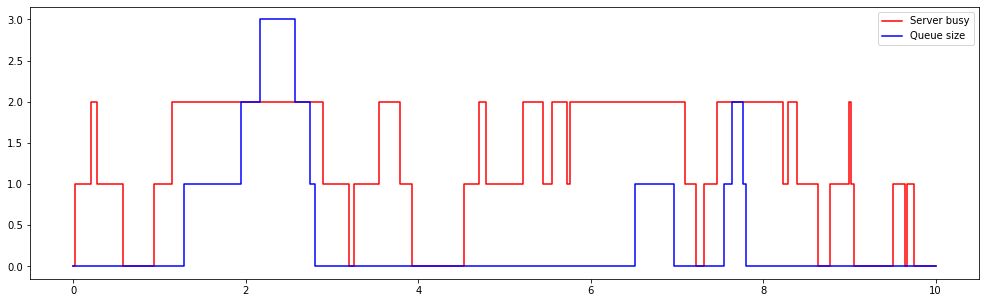

In [10]:
start_t = 0
end_t = 10

tmp_server = []
tmp_queue = []
init_sl = -1
for j in server_load:
    if j[0] < start_t:
        init_sl += 1
        continue
    if j[0] > end_t:
        break
    tmp_server.append(j)
if init_sl >= 0:
    tmp_server = [[start_t,server_load[init_sl][1]]] + tmp_server
tmp_server.append([end_t,tmp_server[-1][1]])

init_qs = -1
for q in queue_size:
    if q[0] < start_t:
        init_qs += 1
        continue
    if q[0] > end_t:
        break
    tmp_queue.append(q)
if init_qs >= 0:
    tmp_queue = [[start_t,queue_size[init_qs][1]]] + tmp_queue
tmp_queue.append([end_t,tmp_queue[-1][1]])

plt.figure(figsize=(17,5))
plt.step([q[0] for q in tmp_server], [q[1] for q in tmp_server], 'r', where='post', label = 'Server busy')
plt.step([q[0] for q in tmp_queue], [q[1] for q in tmp_queue], 'b', where='post', label = 'Queue size')
plt.legend()
plt.show()

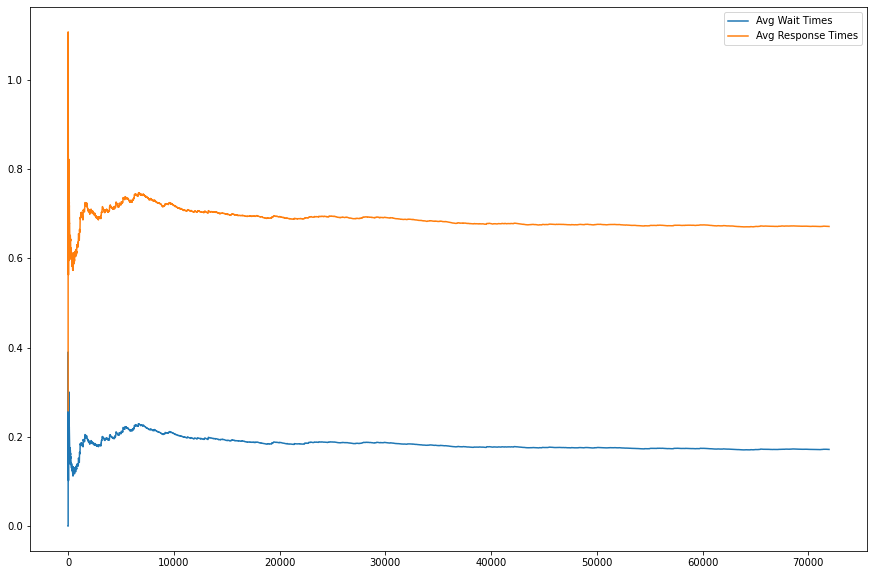

In [11]:
avg_wait = []
n = 1
tot = 0
for w in [wt[0] for wt in waiting_times]:
    tot += w
    avg_wait.append(tot/n)
    n += 1

avg_resp = []
n = 1
tot = 0
for w in [rt[0] for rt in response_times]:
    tot += w
    avg_resp.append(tot/n)
    n += 1

plt.figure(figsize=(15,10))
plt.plot([i for i in range(len(avg_wait))], avg_wait, label = "Avg Wait Times")
plt.plot([i for i in range(len(avg_resp))], avg_resp, label = "Avg Response Times")
plt.legend()
plt.show()

In [12]:
def erlang_c(m,lamb,mu):
    ro = lamb/(m*mu)
    last = 0
    for k in range(m):
        up = pow((m*ro),k)
        last += (up/math.factorial(k))
    mid = math.factorial(m)/(pow((m*ro),m))
    down = 1 + ((1-ro)*mid*last)
    return 1/down

exp_resp = (erlang_c(server_n,arr_rate,srv_rate)/((server_n*srv_rate)-arr_rate))+(1/srv_rate)
print(mean([wt[0] for wt in waiting_times]))
print(mean([rt[0] for rt in response_times]))
print('------')
print(exp_resp)



0.17173283360437647
0.6712191065436047
------
0.6666666666666666


In [7]:
print(mean([wt[0] for wt in waiting_times]))
print(mean([rt[0] for rt in response_times]))

0.25871177501317366
0.5091672790744829
